In [ ]:
import os
os.chdir('/content/drive/MyDrive/MS_ML')

In [ ]:
import pandas as pd
df = pd.read_csv('data_banknote_authentication.csv',names =['col1','col2','col3','col4','target']  ,header=None)
# Class (0 for authentic, 1 for inauthentic)
print(df)

         col1      col2     col3     col4  target
0     3.62160   8.66610  -2.8073 -0.44699       0
1     4.54590   8.16740  -2.4586 -1.46210       0
2     3.86600  -2.63830   1.9242  0.10645       0
3     3.45660   9.52280  -4.0112 -3.59440       0
4     0.32924  -4.45520   4.5718 -0.98880       0
...       ...       ...      ...      ...     ...
1367  0.40614   1.34920  -1.4501 -0.55949       1
1368 -1.38870  -4.87730   6.4774  0.34179       1
1369 -3.75030 -13.45860  17.5932 -2.77710       1
1370 -3.56370  -8.38270  12.3930 -1.28230       1
1371 -2.54190  -0.65804   2.6842  1.19520       1

[1372 rows x 5 columns]


In [ ]:
# Cheking null values
print(df.isnull().sum())

col1      0
col2      0
col3      0
col4      0
target    0
dtype: int64


In [ ]:
import numpy as np

class KNN:
  def __init__(self,
               distance_type = 'euclidean distance'):

    self.samples = None
    self.labels = None
    self.distance_type = distance_type.lower()

  def dist_cal(self,p1,p2):
    if 'euclidean' in self.distance_type:
      return np.sqrt(np.sum((p1-p2)**2))

    if 'manhattan' in self.distance_type:
      return sum(abs(p1-p2))

  def fit(self,x,y):

    x = np.array(x)
    y = np.array(y)

    self.samples = np.empty((0,len(x[1])))
    self.labels = np.array([])

    for x_,y_ in zip(x,y):
      self.labels = np.append(self.labels,y)
      self.samples = np.append(self.samples,np.array([x_]),axis = 0)

  def predict(self,x,
              neighbours = 3):

    x = np.array(x)
    pred = np.array([])
    for x_ in x:
      distances_calculated = np.array([])
      for x_w in self.samples:
        distances_calculated = np.append(distances_calculated,self.dist_cal(x_w,x_))

      dist = np.argsort(distances_calculated)[:neighbours]
      labels = self.labels[dist]

      unique ,counts = np.unique(labels, return_counts=True)
      unique_counts = dict(zip(unique, counts))
      pred = np.append(pred, max(unique_counts, key=unique_counts.get))
    return pred

In [ ]:
X = df.iloc[:,:-1] #selection features and droping last column
y = df.iloc[:,-1] # selection last columns as label/target

In [ ]:
from sklearn.model_selection import train_test_split
# Split into training and test set
# random_state =42 is used for reproducing your problem the same every time it is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
K_nearest_neighbour_predictor = KNN(distance_type = 'euclidean distance')
K_nearest_neighbour_predictor.fit(X_train,y_train)

In [ ]:
# Function to print out comparision of model prediction and true labels
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
def validation(y_true,y_pred):
  auc=accuracy_score(y_true,y_pred)
  print('Testing accuracy of the model:',np.round(auc,2)) #accuracy of results
  print('Confuction matrix')
  cm = confusion_matrix(y_true,y_pred)
  print(cm) #confusion matrix of result

  unique, counts = np.unique(y_true, return_counts=True)
  ax = sns.heatmap(cm/counts, annot=True,
              fmt='.2%', cmap='Blues')

  ax.set_title(' Confusion Matrix')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ')
  print(classification_report(y_true,y_pred, target_names=['authentic','inauthentic'])) #classification report
  return auc

Testing accuracy of the model: 1.0
Confuction matrix
[[613   1]
 [  0 483]]
              precision    recall  f1-score   support

   authentic       1.00      1.00      1.00       614
 inauthentic       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



0.9990884229717412

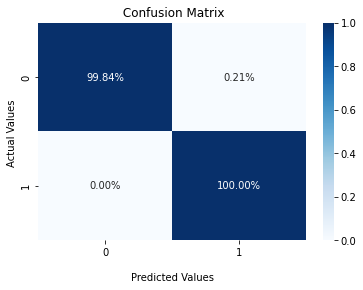

In [ ]:
# training evaluate metrics
y_pred = K_nearest_neighbour_predictor.predict(X_train)
#Checking the accuracy
validation(y_train, y_pred)

Testing accuracy of the model: 1.0
Confuction matrix
[[148   0]
 [  0 127]]
              precision    recall  f1-score   support

   authentic       1.00      1.00      1.00       148
 inauthentic       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



1.0

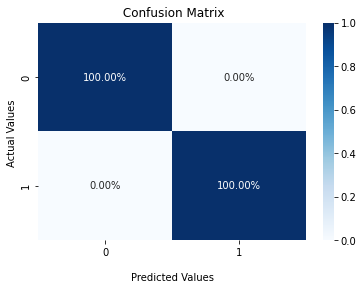

In [ ]:
# test evaluate metrics
y_pred = K_nearest_neighbour_predictor.predict(X_test)
#Checking the accuracy
validation(y_test, y_pred)

In [ ]:
# Changing distance function to check if thier any differences in resuls.
K_nearest_neighbour_predictor = KNN(distance_type = 'manhattan distance')
K_nearest_neighbour_predictor.fit(X_train,y_train)

Testing accuracy of the model: 1.0
Confuction matrix
[[614   0]
 [  0 483]]
              precision    recall  f1-score   support

   authentic       1.00      1.00      1.00       614
 inauthentic       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



1.0

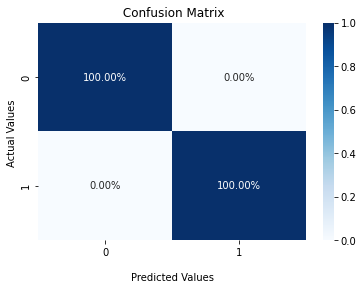

In [ ]:
# training evaluate metrics
y_pred = K_nearest_neighbour_predictor.predict(X_train)
#Checking the accuracy
validation(y_train, y_pred)

Testing accuracy of the model: 1.0
Confuction matrix
[[148   0]
 [  0 127]]
              precision    recall  f1-score   support

   authentic       1.00      1.00      1.00       148
 inauthentic       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



1.0

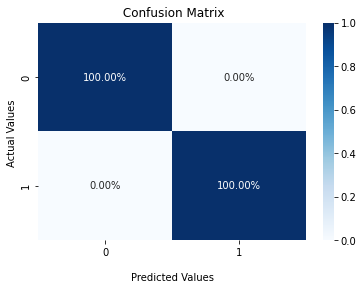

In [ ]:
# test evaluate metrics
y_pred = K_nearest_neighbour_predictor.predict(X_test)
#Checking the accuracy
validation(y_test, y_pred)

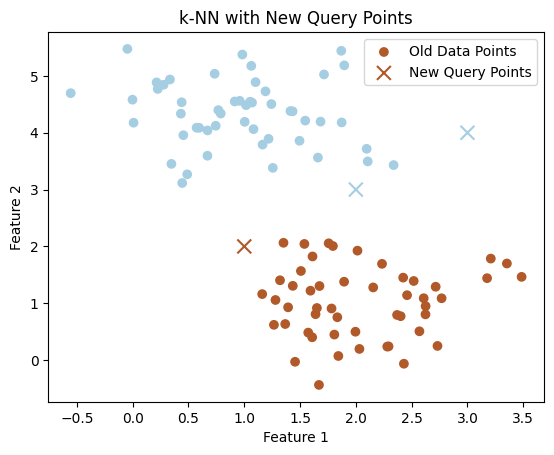

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# Create a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)


# Define new query points
query_points = np.array([[1, 2], [2, 3], [3, 4]])
# Predict class labels for the query points
query_predictions = knn.predict(query_points)

# Create a scatter plot for old data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

# Create a scatter plot for new query points with different markers
plt.scatter(query_points[:, 0], query_points[:, 1], c=query_predictions, cmap=plt.cm.Paired, marker='x', s=100)

# Add labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-NN with New Query Points")
plt.legend(['Old Data Points', 'New Query Points'])

# Show the plot
plt.show()